<a href="https://colab.research.google.com/github/deepugupta0820/heart-disease-a-classification-problem/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Loading the Dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [43]:
heart_data = pd.read_csv('/content/heart.csv')

In [44]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [45]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [46]:
heart_data.shape

(1025, 14)

# Exploratory Data Analysis

In [47]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [48]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking correlation between features

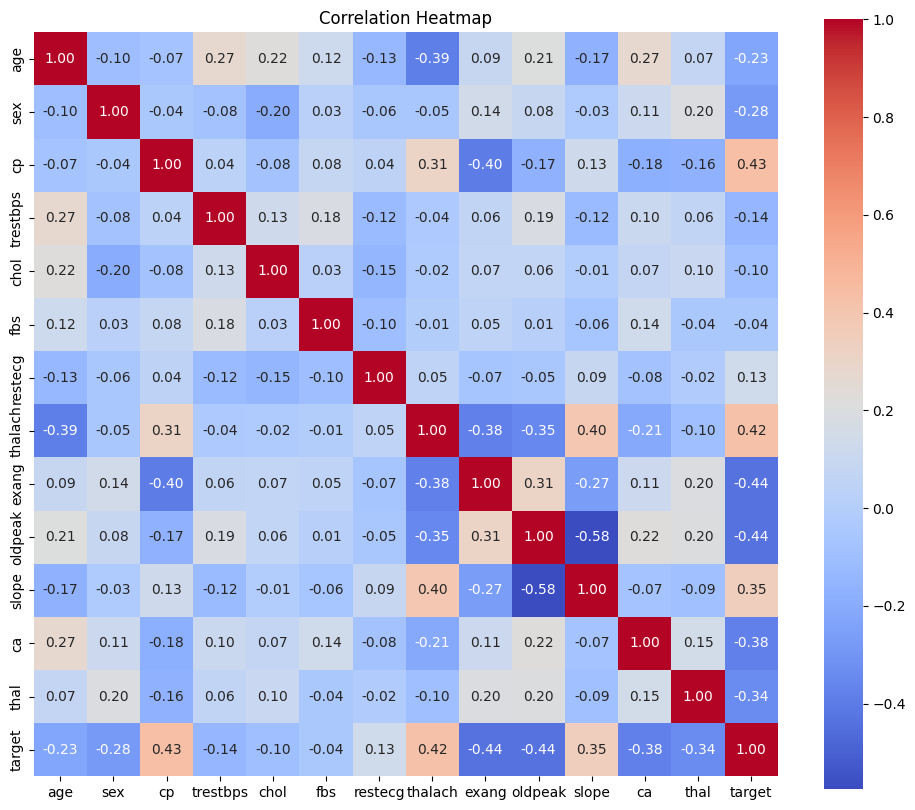

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [50]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [51]:
heart_data.duplicated().sum()

np.int64(723)

In [52]:
heart_data = heart_data.drop_duplicates()

Checking for outliers

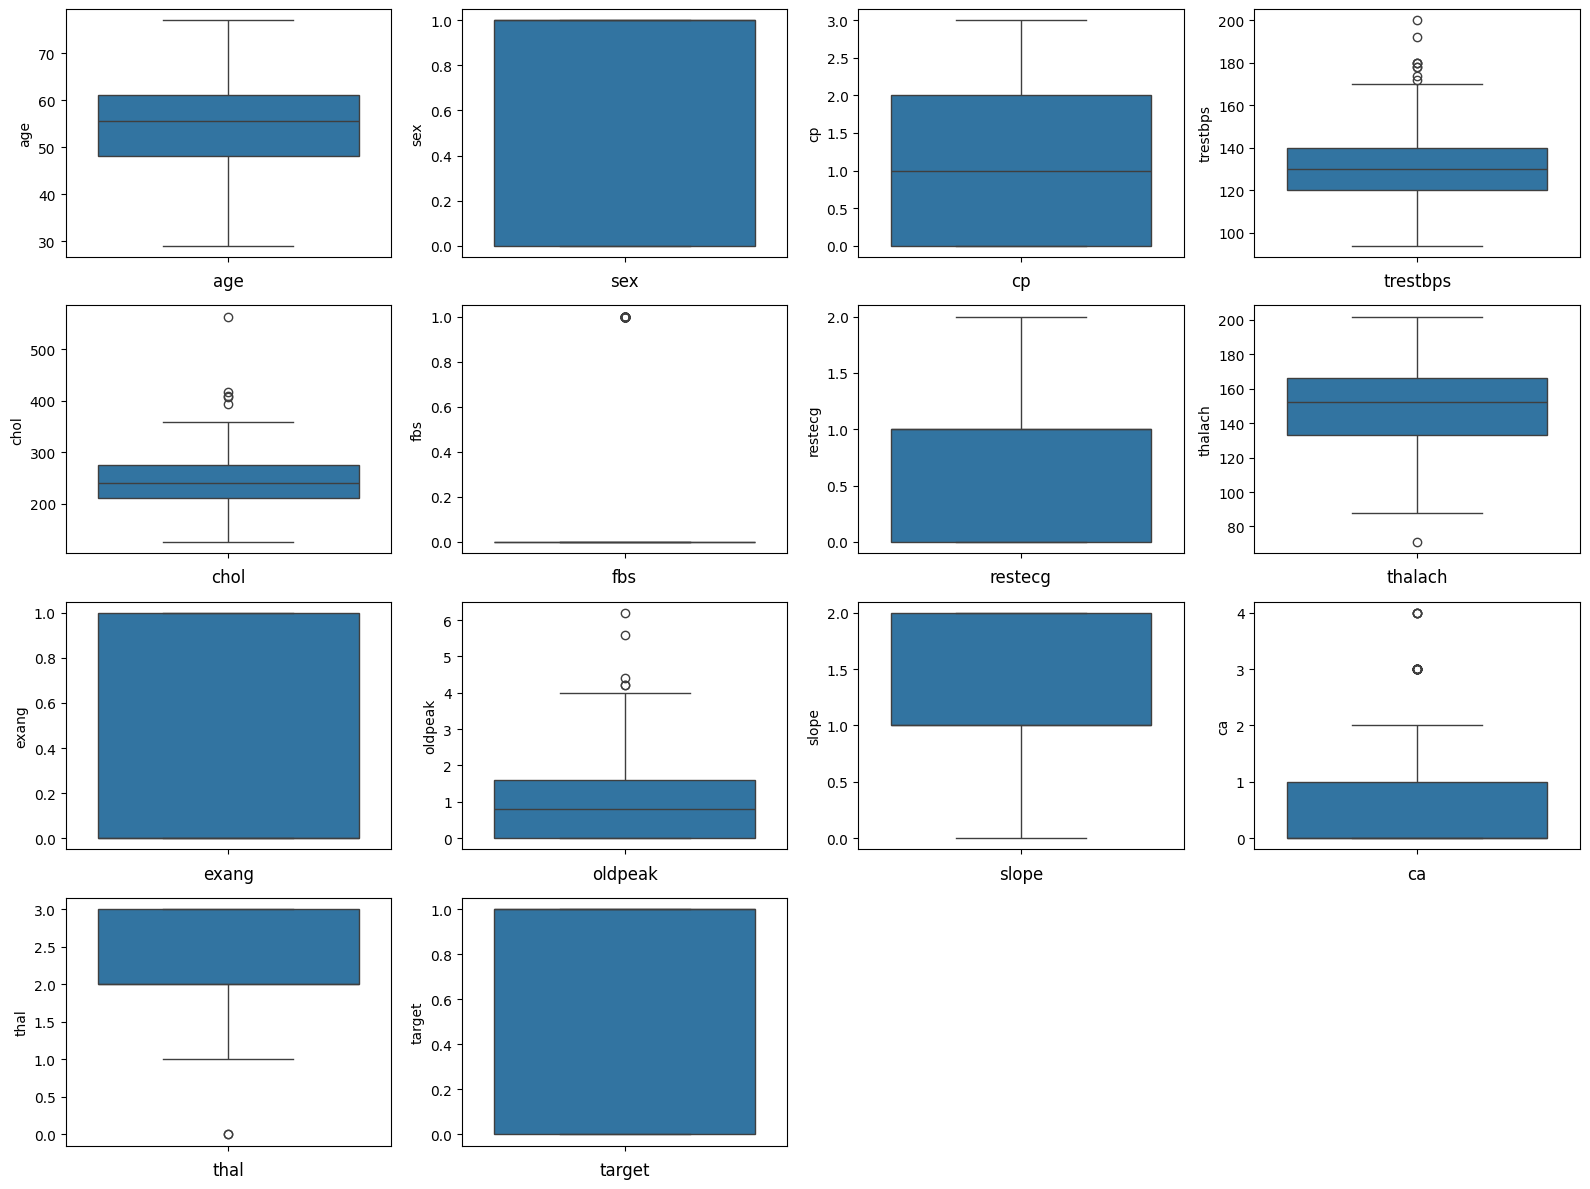

In [53]:
plt.figure(figsize = (16,12))
plot_no = 1
for i in heart_data.columns:
    ax = plt.subplot(4,4, plot_no)
    sns.boxplot(heart_data[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

Capping the Outliers

In [54]:
def outlier_capping(dataframe: pd.DataFrame, df_columns:list):
    capped_df = dataframe.copy()
    for i in df_columns:
        q1 = capped_df[i].quantile(0.25)
        q3 = capped_df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q1 - 1.5 *iqr
        capped_df.loc[capped_df[i] >upper_limit, i] = upper_limit
        capped_df.loc[capped_df[i] <lower_limit, i] = lower_limit
    return capped_df

In [55]:
heart_data=outlier_capping(heart_data,heart_data.columns)

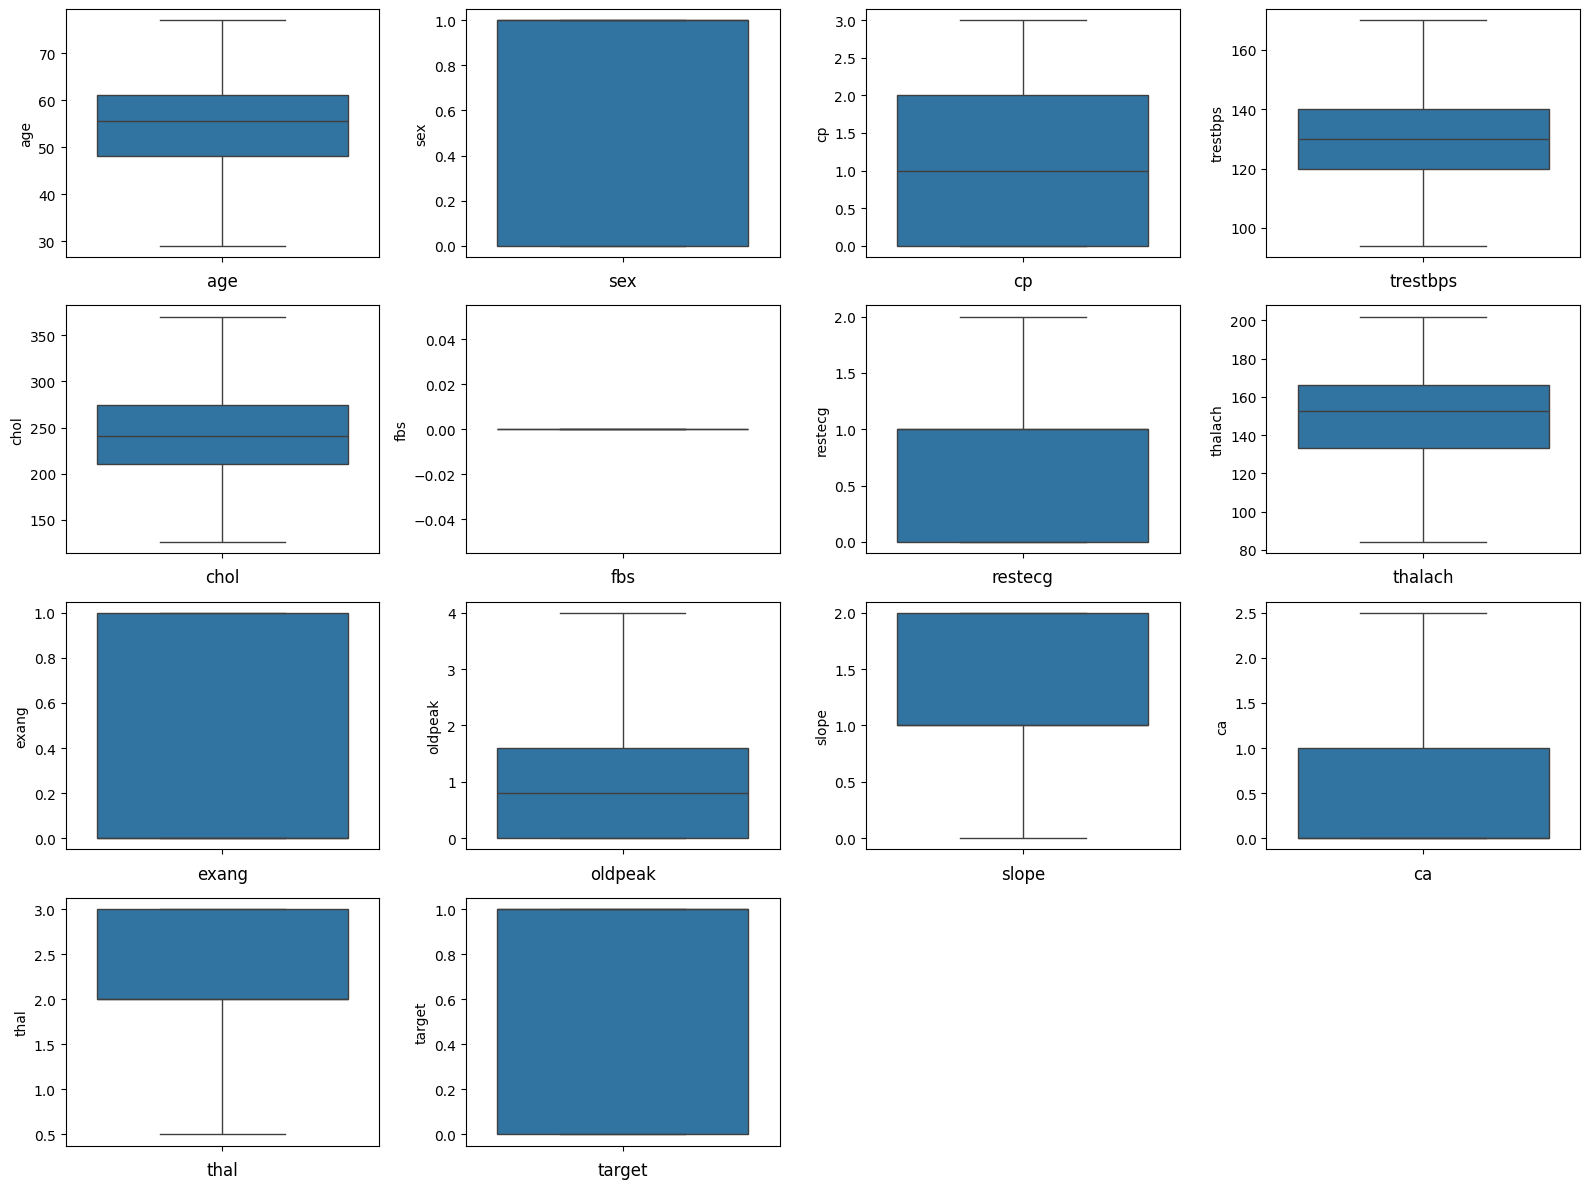

In [56]:
plt.figure(figsize = (16,12))
plot_no = 1
for i in heart_data.columns:
    ax = plt.subplot(4,4, plot_no)
    sns.boxplot(heart_data[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

Basic Visualizations of the Dataset

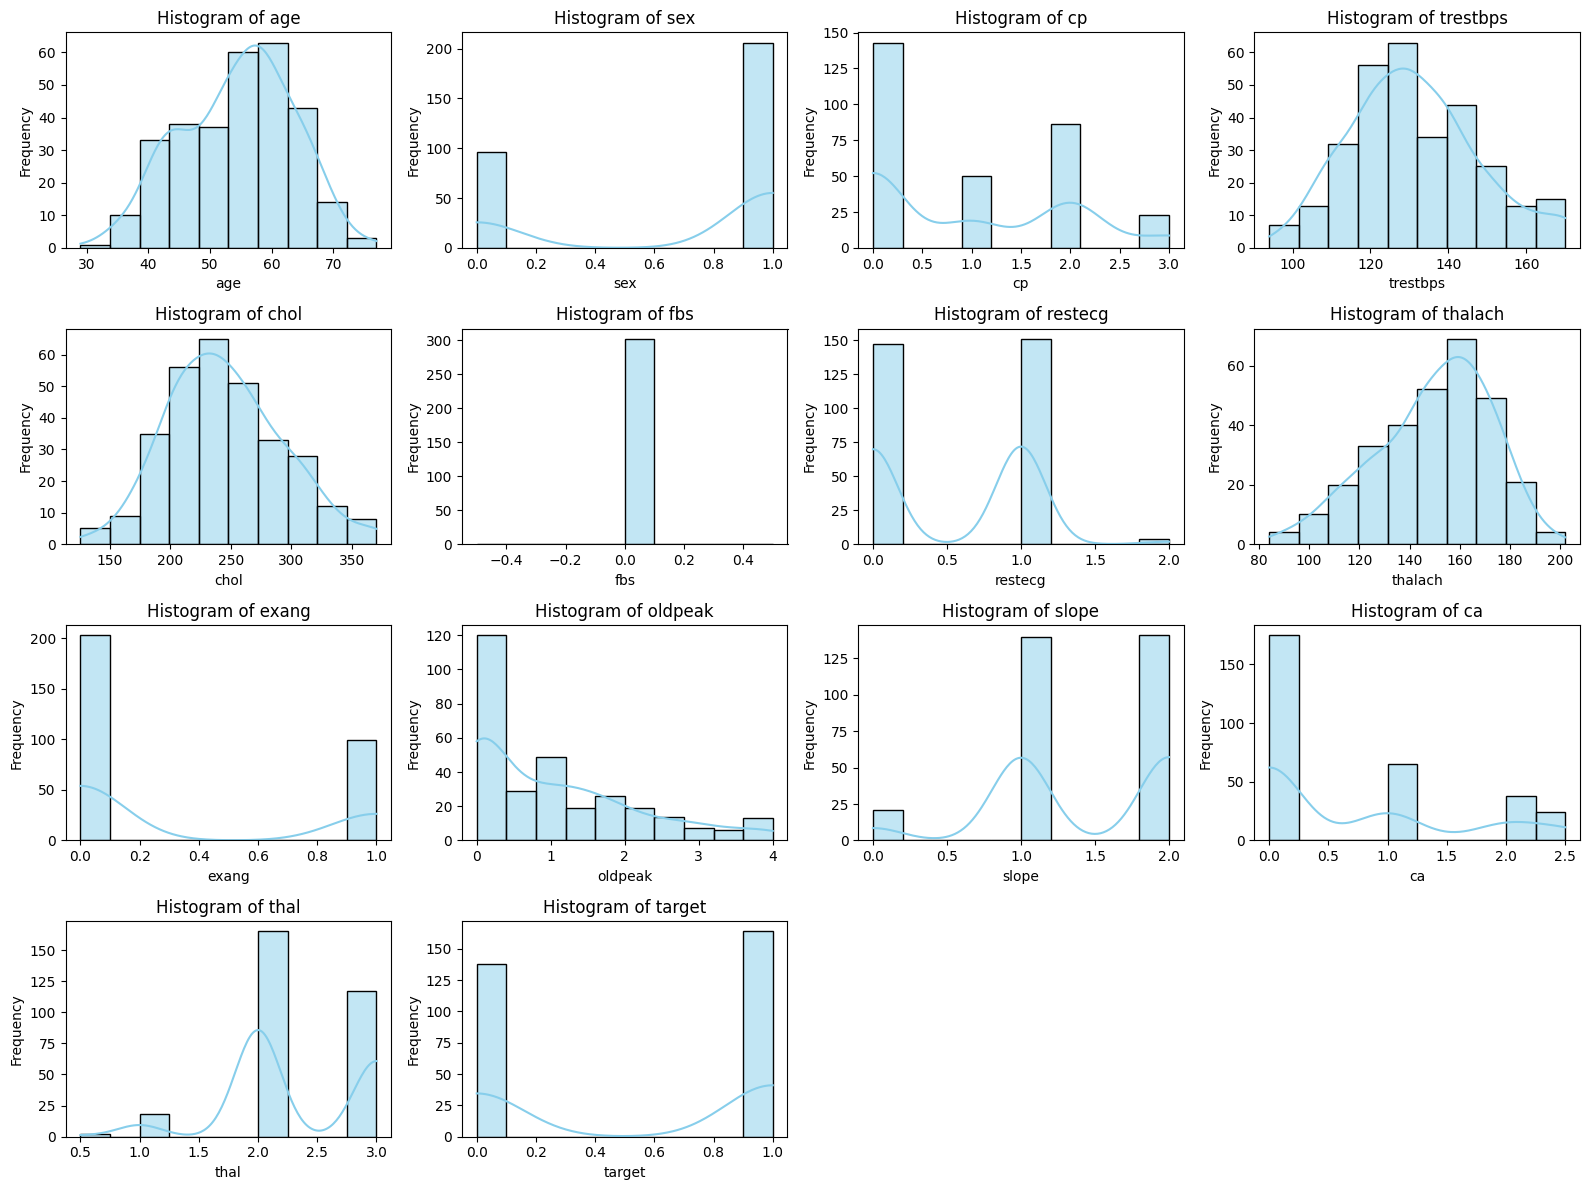

In [57]:
plt.figure(figsize = (16,12))
plot_no = 1
for column in heart_data.columns:
    ax = plt.subplot(4,4, plot_no)
    sns.histplot(heart_data[column], bins=10, color='skyblue', edgecolor='black',kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(column))
    plot_no +=1
plt.tight_layout()
plt.show()

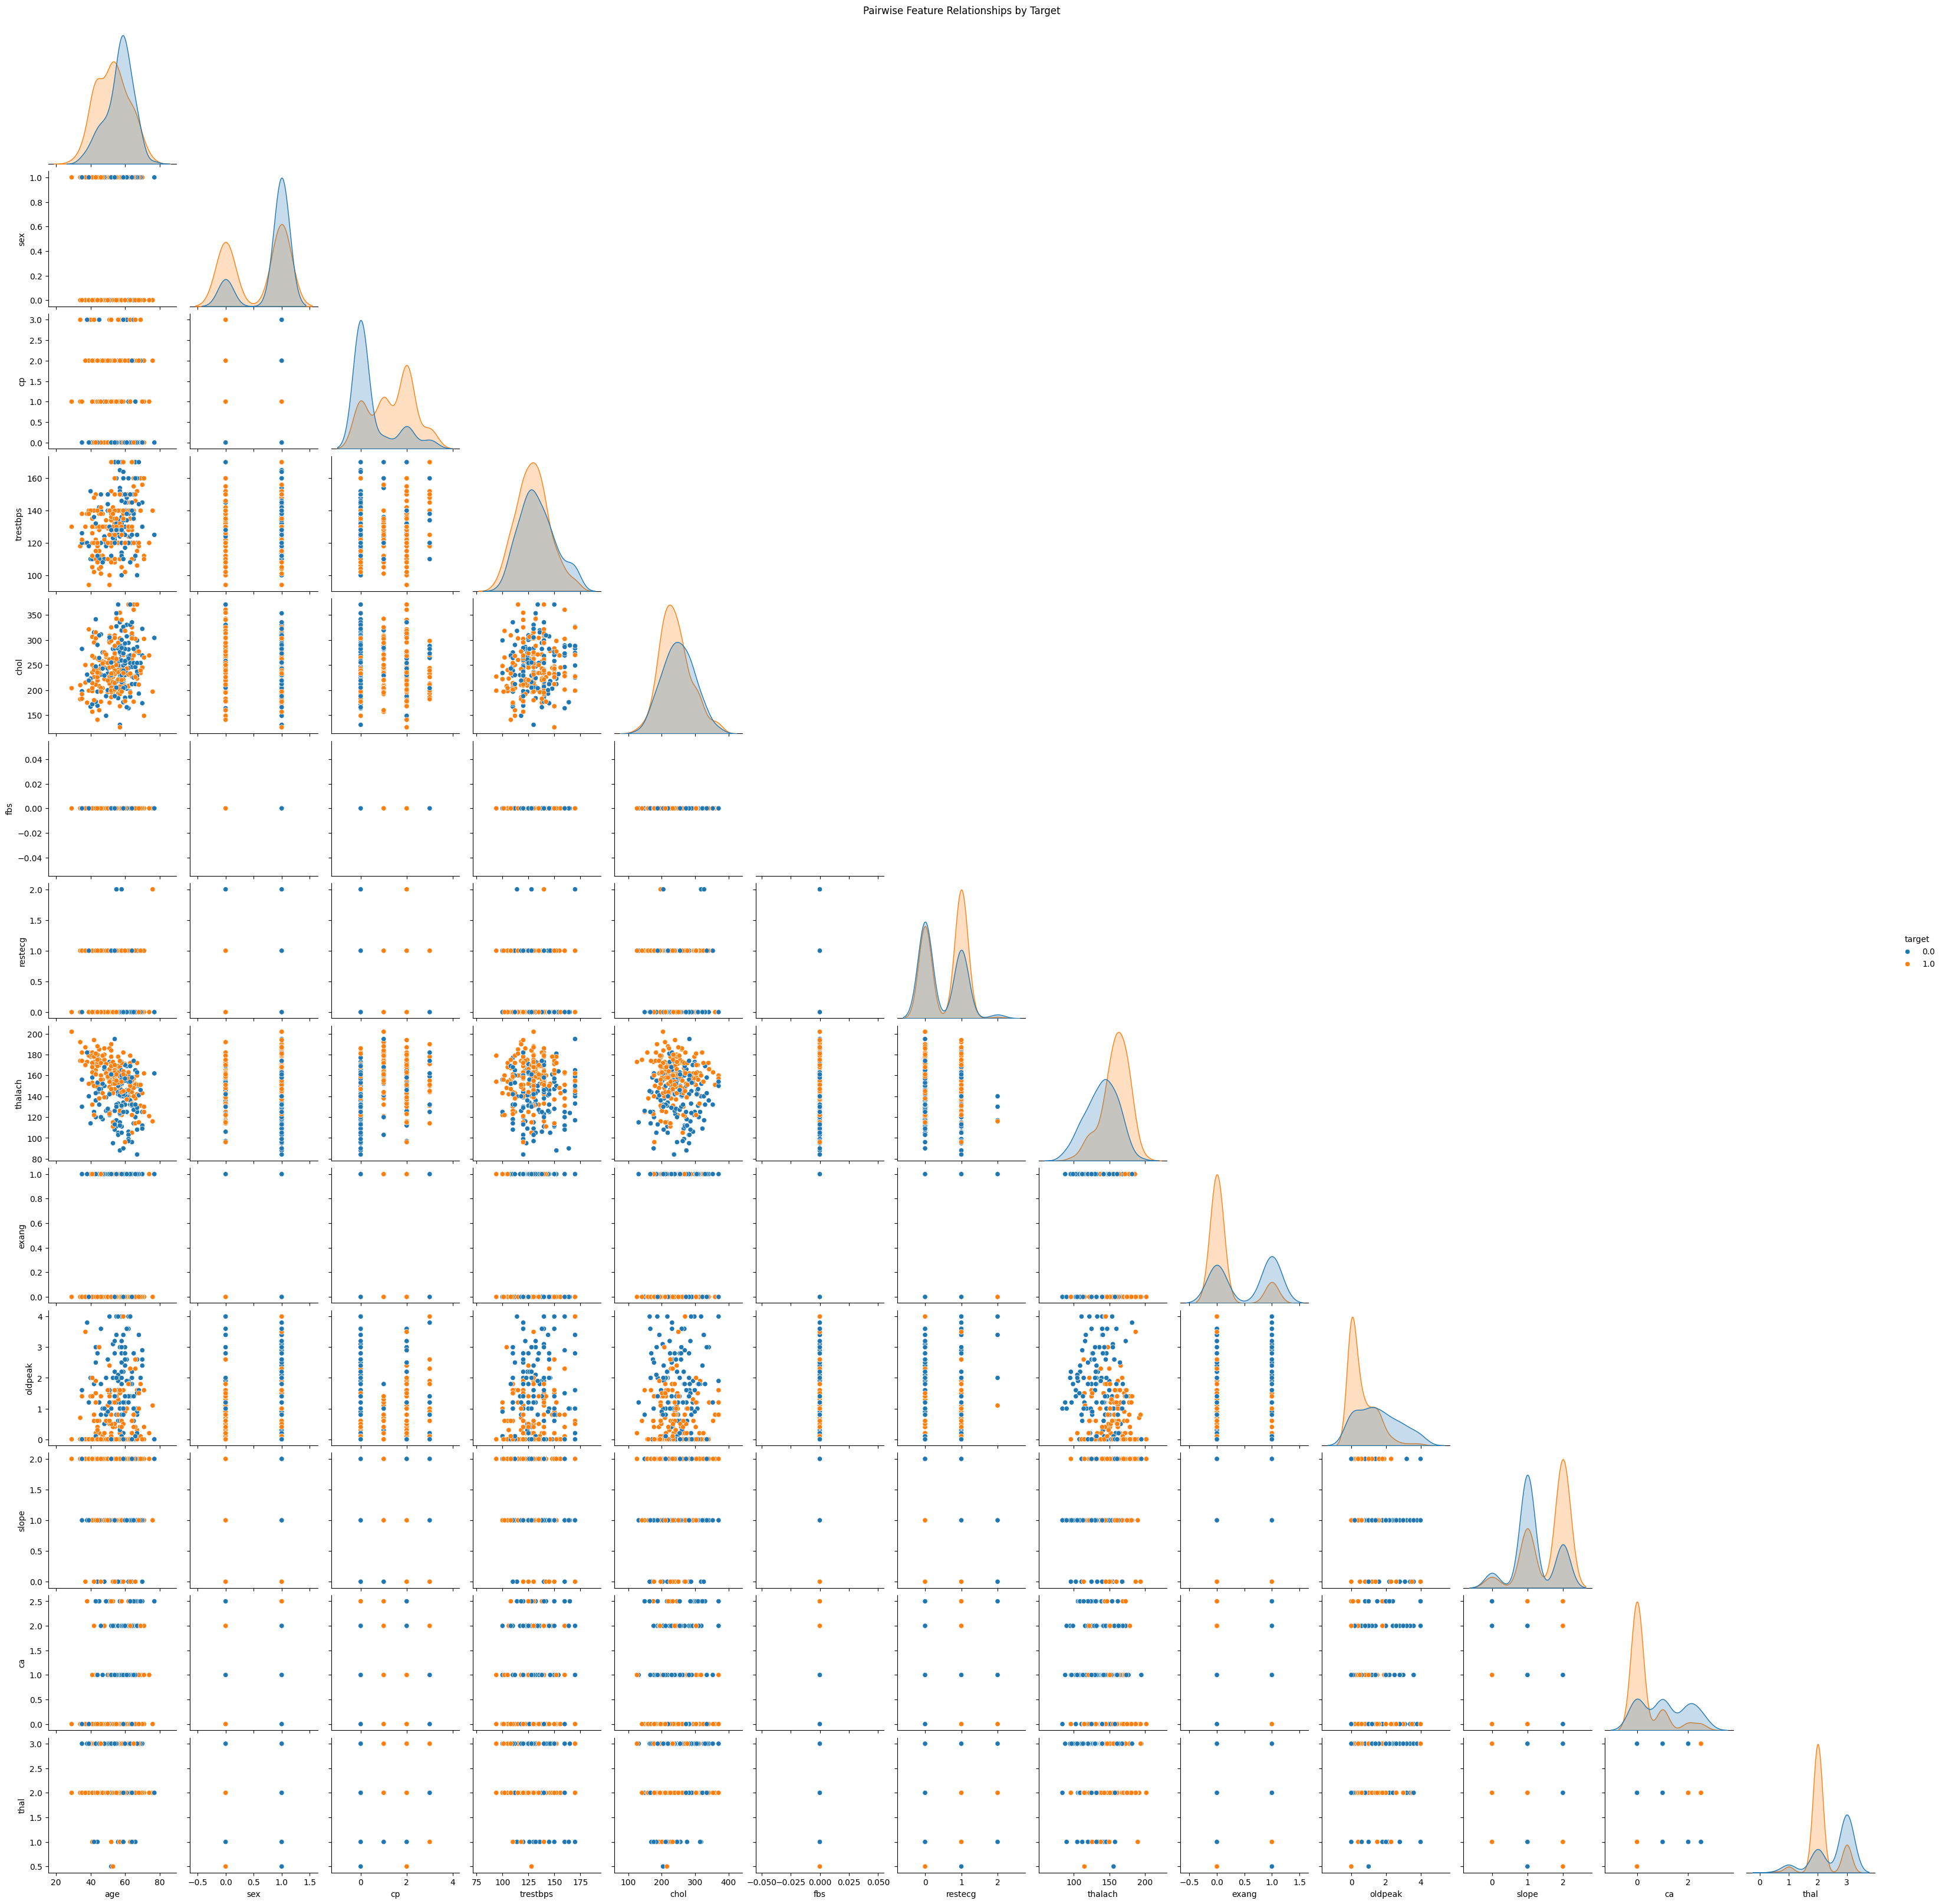

In [58]:
sns.pairplot(heart_data, hue='target', corner=True)
plt.suptitle('Pairwise Feature Relationships by Target', y=1)
plt.show()

checking the distribution of target variable

target
1.0    164
0.0    138
Name: count, dtype: int64


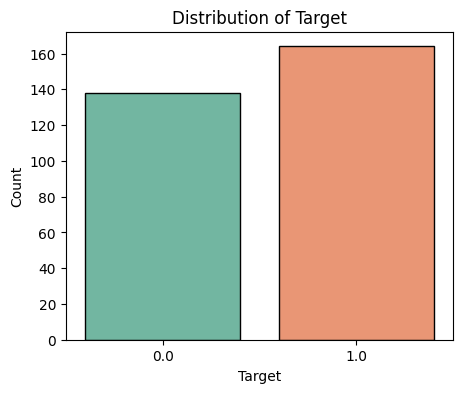

In [59]:
print(heart_data['target'].value_counts())
plt.figure(figsize=(5,4))
sns.barplot(x=heart_data['target'].value_counts().index, y=heart_data['target'].value_counts(), palette='Set2', edgecolor='black')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')
plt.show()

# Divide data into training testing classes

In [60]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [61]:
print(X)

      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    52.0  1.0   0       125  212.0    0      1.0    168.0    0.0      1.0   
1    53.0  1.0   0       140  203.0    0      0.0    155.0    1.0      3.1   
2    70.0  1.0   0       145  174.0    0      1.0    125.0    1.0      2.6   
3    61.0  1.0   0       148  203.0    0      1.0    161.0    0.0      0.0   
4    62.0  0.0   0       138  294.0    0      1.0    106.0    0.0      1.9   
..    ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
723  68.0  0.0   2       120  211.0    0      0.0    115.0    0.0      1.5   
733  44.0  0.0   2       108  141.0    0      1.0    175.0    0.0      0.6   
739  52.0  1.0   0       128  255.0    0      1.0    161.0    1.0      0.0   
843  59.0  1.0   3       160  273.0    0      0.0    125.0    0.0      0.0   
878  54.0  1.0   0       120  188.0    0      1.0    113.0    0.0      1.4   

     slope   ca  thal  
0      2.0  2.0   3.0  
1      0.0  0.0

In [62]:
print(Y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
723    1.0
733    1.0
739    0.0
843    0.0
878    0.0
Name: target, Length: 302, dtype: float64


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [64]:
print(X.shape,X_train.shape,X_test.shape)

(302, 13) (241, 13) (61, 13)


# Model Building

In [65]:
models_score_list = {}

## KNN Algorithm

In [66]:
knn_scores = []
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    score = round(knn_classifier.score(X_test, Y_test), 2)
    knn_scores.append(score)

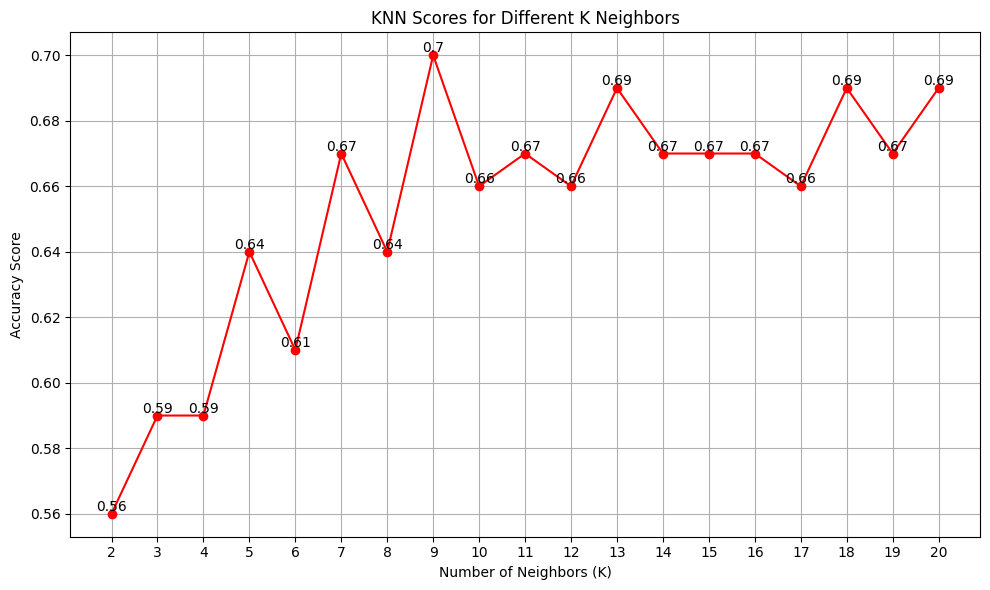

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), knn_scores, color='red', marker='o')

for k, score in zip(range(2, 21), knn_scores):
    plt.text(k, score, str(score), ha='center', va='bottom')

plt.xticks(range(2, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.title('KNN Scores for Different K Neighbors')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
knn_classifier.fit(X_train, Y_train)
knn_prediction=knn_classifier.predict(X_test)
models_score_list["KNN Classifier"] = accuracy_score(Y_test, knn_prediction)
print(classification_report(Y_test, knn_prediction))

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.67        28
         1.0       0.71      0.76      0.74        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



## Support Vector Machine

In [69]:
svc_score = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
  svc_classifier = SVC(kernel=kernels[i])
  svc_classifier.fit(X_train, Y_train)
  s_score = round(svc_classifier.score(X_test, Y_test), 2)
  svc_score.append(s_score)

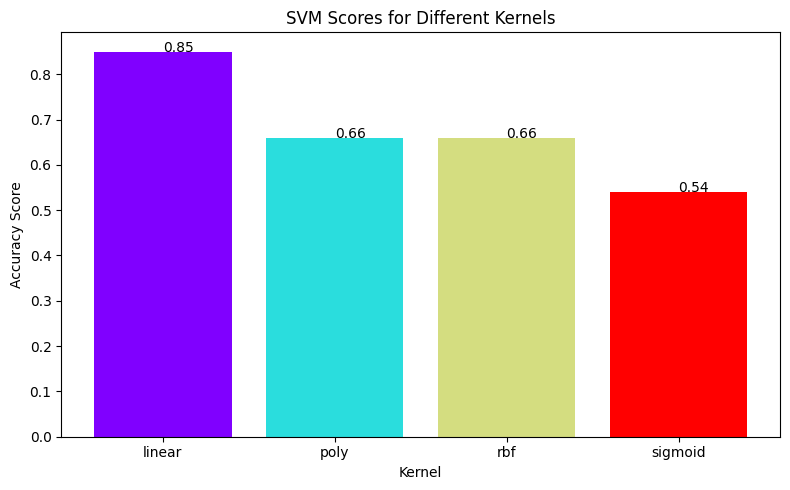

In [70]:
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(8, 5))
plt.bar(kernels, svc_score, color=colors)
for i in range(len(kernels)):
    plt.text(i, svc_score[i], svc_score[i])
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')
plt.title('SVM Scores for Different Kernels')
plt.tight_layout()

In [71]:
svc_classifier = SVC(kernel=kernels[0])
svc_classifier.fit(X_train, Y_train)
svc_prediction=svc_classifier.predict(X_test)
models_score_list["Support Vector Classifier"] = accuracy_score(Y_test, svc_prediction)
print(accuracy_score(Y_test, svc_prediction))

0.8524590163934426


## Decision Tree

In [72]:
dt_scores = []
for i in range(1, len(X.columns)+1):
  dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
  dt_classifier.fit(X_train, Y_train)
  d_score = round(dt_classifier.score(X_test, Y_test), 2)
  dt_scores.append(d_score)
print(dt_scores)

[0.74, 0.7, 0.74, 0.67, 0.79, 0.75, 0.72, 0.69, 0.75, 0.77, 0.77, 0.79, 0.75]


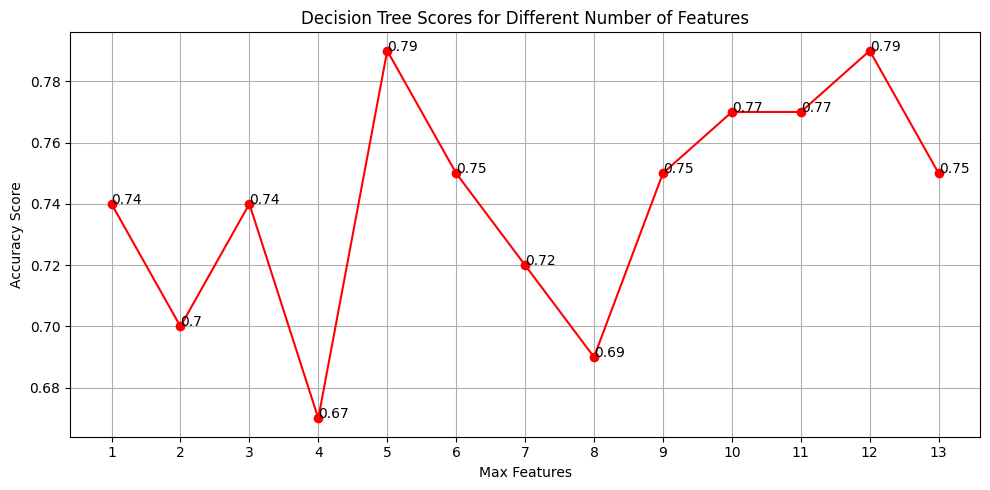

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(X.columns)+1), dt_scores, color='red', marker='o')
for i in range(1, len(X.columns)+1):
    plt.text(i, dt_scores[i-1], dt_scores[i-1])
plt.xticks(range(1, len(X.columns)+1))
plt.xlabel('Max Features')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Scores for Different Number of Features')
plt.grid(True)
plt.tight_layout()

In [74]:
dt_classifier = DecisionTreeClassifier(max_features=12, random_state=0)
dt_classifier.fit(X_train, Y_train)
dt_prediction=dt_classifier.predict(X_test)
models_score_list["Decision Tree Classifier"] = accuracy_score(Y_test, dt_prediction)
print(accuracy_score(Y_test, dt_prediction))

0.7868852459016393


## Random Forest

In [75]:
rf_scores = []
estimators = [10, 20, 100, 200, 500]
for i in estimators:
  rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
  rf_classifier.fit(X_train, Y_train)
  r_score = round(rf_classifier.score(X_test, Y_test), 2)
  rf_scores.append(r_score)

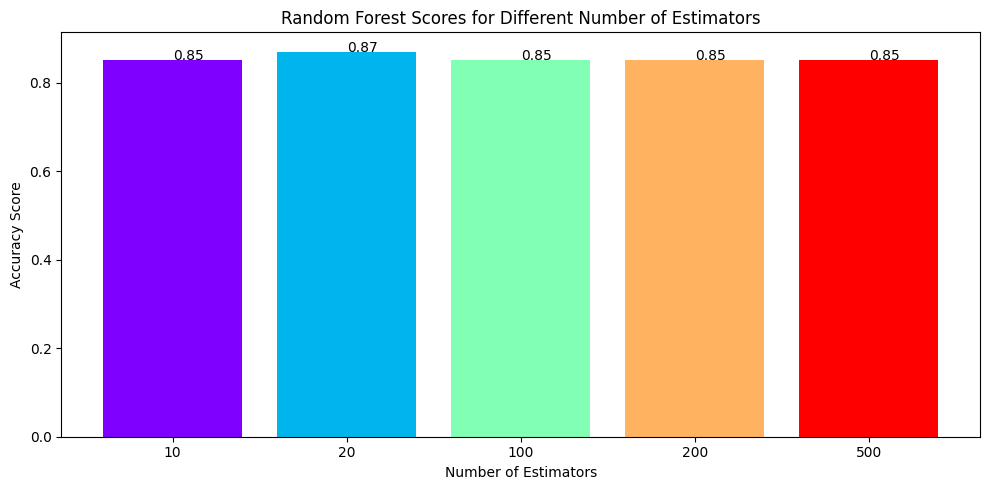

In [76]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.figure(figsize=(10, 5))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Scores for Different Number of Estimators')
plt.tight_layout()

In [77]:
rf_model = RandomForestClassifier(n_estimators=20, random_state=0)
rf_model.fit(X_train, Y_train)
rf_prediction=rf_model.predict(X_test)
models_score_list["Random Forest Classifier"] = accuracy_score(Y_test, rf_prediction)
print(accuracy_score(Y_test, rf_prediction))

0.8688524590163934


## Logistic Regression

In [78]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_prediction = logistic_model.predict(X_test)
models_score_list["Logistic Regression"] = accuracy_score(Y_test, logistic_prediction)
print(classification_report(Y_test, logistic_prediction))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        28
         1.0       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Performance Comparison of Models

In [79]:
scores=pd.DataFrame(list(models_score_list.items()), columns=['Classifier', 'Score'])
scores

,Classifier,Score
0,KNN Classifier,0.704918
1,Support Vector Classifier,0.852459
2,Decision Tree Classifier,0.786885
3,Random Forest Classifier,0.868852
4,Logistic Regression,0.901639


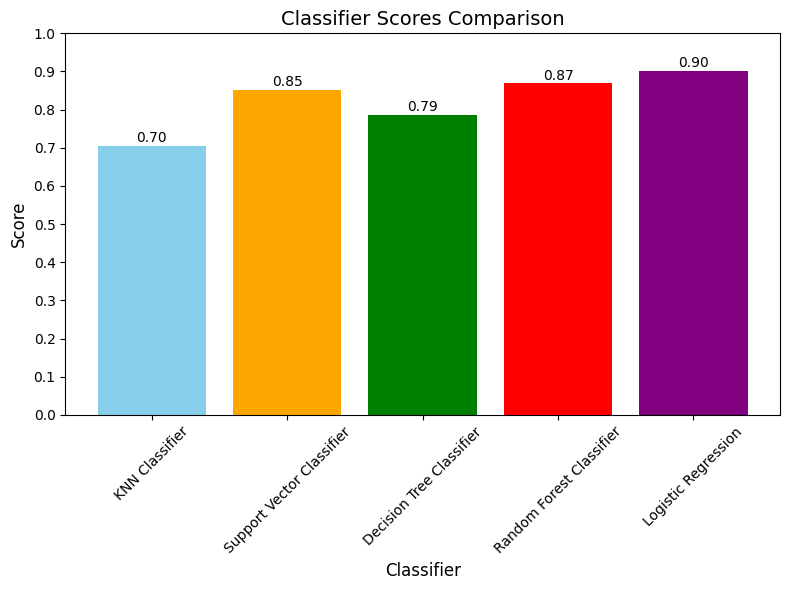

In [80]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink']
plt.figure(figsize=(8, 6))
plt.bar(scores['Classifier'], scores['Score'], color=colors)

plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Classifier Scores Comparison', fontsize=14)

plt.yticks([i/10 for i in range(11)])
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(scores['Score']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()

plt.show()

# Save Trained Models

In [81]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(logistic_model, file)